<a href="https://colab.research.google.com/github/erickgt00/PD_MCD/blob/main/Practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica 2

Análisis inicial de los Datos.

In [1]:
# Librerias a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

## Simple vista a los Datos

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Tenemos variables categóricas (YES, NO)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Tenemos información incompleta, iremos trabajando la base durante el proyecto

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Aqui describimos los datos númericos

In [7]:
# Vamos a cambiar el tipo de dato de Credit_History a objeto

df['Credit_History'] = df['Credit_History'].astype('O')

In [8]:
# Vamos a describir los datos categóricos

df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [9]:
# Vamos a quitar el ID porque no es importante para el modelo

df.drop('Loan_ID', axis=1, inplace=True)

In [10]:
df.duplicated().any()


False

No tenemos duplicados

In [11]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


The percentage of Y class : 0.69
The percentage of N class : 0.31


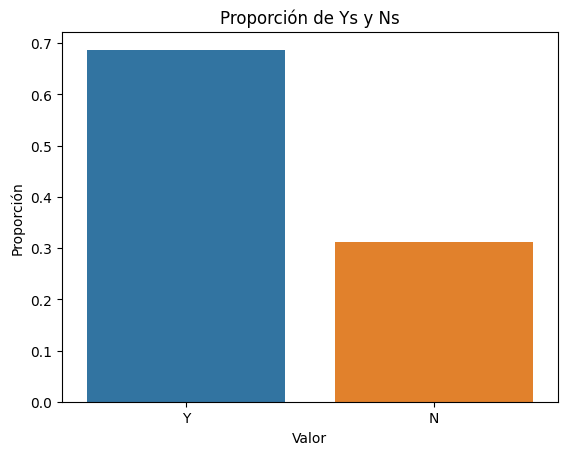

In [12]:
proporcion = df['Loan_Status'].value_counts(normalize=True)
sns.barplot(x=proporcion.index, y=proporcion.values)
plt.xlabel('Valor')
plt.ylabel('Proporción')
plt.title('Proporción de Ys y Ns')
print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))
plt.show()

Como podemos ver en este principal análisis los datos necesitan ser tratados antes de realizar un modelo. Podemos ver que en nuestra variable de interes (Si le darán un crédito o no) un 30% de las personas no son aprovadas para tener un crédito.

## Práctica 3

Visualización de los datos

In [13]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Vamos a trabajar primero con las columnas de categorías

In [14]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


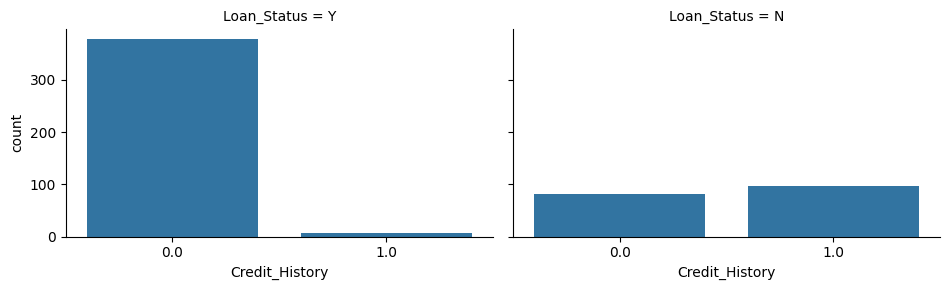

In [16]:
# Credit_History

grid = sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

No otorgamos un préstamo a la mayoría de las personas con Historial de Crédito = 0
Pero sí otorgamos un préstamo a la mayoría de las personas con Historial de Crédito = 1
Por lo tanto, podemos decir que si tienes Historial de Crédito = 1, tendrás una mejor probabilidad de obtener un préstamo.

Esto se convierte en una característica importante.

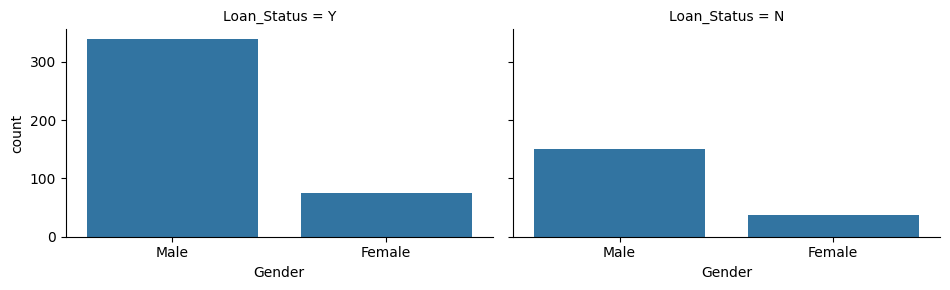

In [17]:
# Gender

grid = sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Gender');


La mayoría de los hombres obtuvieron un préstamo y la mayoría de las mujeres también lo hicieron, así que no hay un patrón claro. Creo que esta característica no es tan importante; lo veremos más adelante.

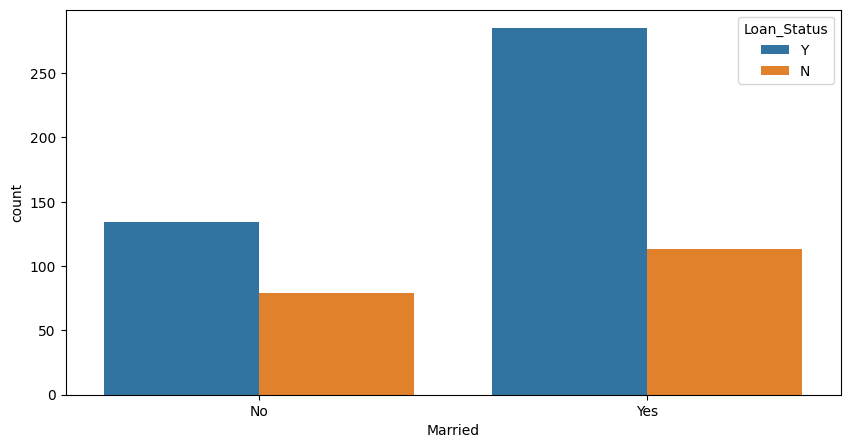

In [19]:
# Married

plt.figure(figsize=(10,5))
sns.countplot(x='Married', hue='Loan_Status', data=df);


La mayoría de las personas que se casan obtuvieron un préstamo. Si estás casado, ¡tienes una mejor probabilidad de obtener un préstamo! ¡Buena característica!

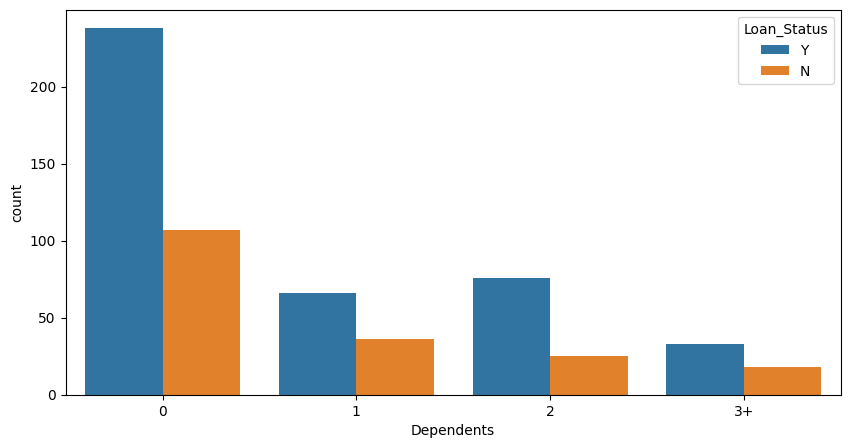

In [21]:
# Dependents

plt.figure(figsize=(10,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);

Si el número de dependientes es igual a 0, tenemos una probabilidad mucho mayor de obtener un préstamo (muy alta probabilidad). Buena característica.

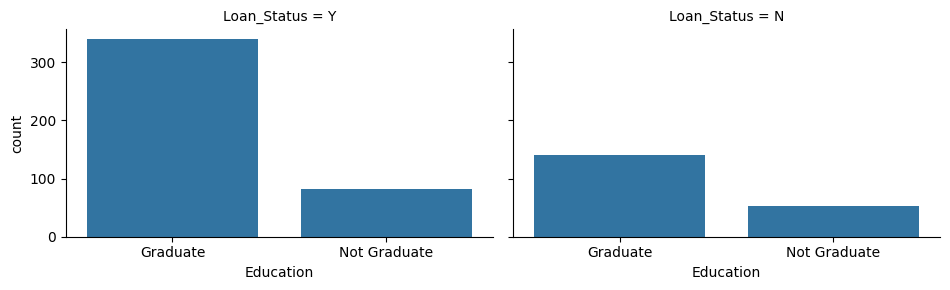

In [22]:
# Education

grid = sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Education');


Si estás graduado o no, tendrás casi la misma probabilidad de obtener un préstamo (no hay un patrón claro). Aquí puedes ver que la mayoría de las personas se graduaron y la mayoría de ellas obtuvieron un préstamo. Por otro lado, la mayoría de las personas que no se graduaron también obtuvieron un préstamo, pero con un porcentaje menor que las personas que se graduaron. No es una característica importante.

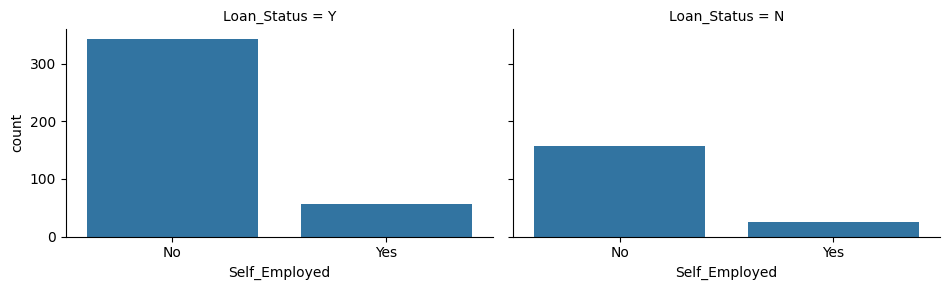

In [24]:
# Self_Employed

grid = sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

No hay un patrón (igual que con la Educación)

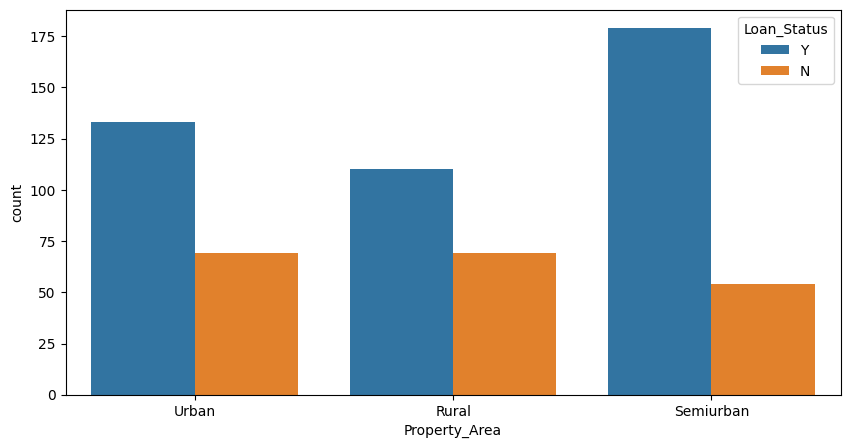

In [26]:
# Property_Area

plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);


Podemos decir que la zona de propiedad Semiurbana tiene más del 50% de probabilidad de obtener un préstamo. Buena característica.

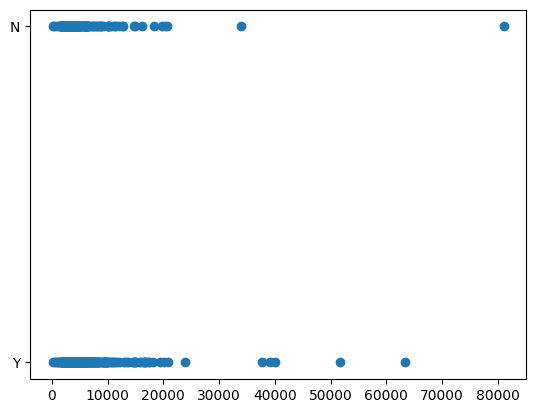

In [27]:
# ApplicantIncome

plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

Sin patron

Ahora observaremos las columnas numericas

In [28]:
df.groupby('Loan_Status').median() #la mediana para que no se vea afectada con los outliers


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


Podemos observar que cuando tenemos un ingreso medio bajo en CoapplicantIncome, obtenemos Loan_Status = N. Por lo tanto, CoapplicantIncome es una buena característica.